In [1]:
#importing csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import datetime

In [2]:
def show_elbow(df):
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel=KMeans(n_clusters=k)
        kmeanModel.fit(df)
        distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))
    plt.plot(K,distortions,'bx-')
    plt.xlabel('k')
    plt.ylabel('Distorion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    

def convert_to_date(df):
    new_list=[]
    df['time']=pd.to_datetime(df['time'])
    df['time']=df['time'].dt.strftime('%Y-%m-%d %H:%M:%S')
    #df['time']=pd.to_datetime(df['time'])
    for values in df['time']:
        converted = pd.to_datetime(values).value
        new_list.append(converted)
    df['Unix Timestamp']=new_list
    return df

In [3]:
df=pd.read_csv('query.csv')
df=df.sort_values(by=['time'])
df= convert_to_date(df)
df.head(30)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Unix Timestamp
912,1951-05-28 15:59:23,28.925,86.685,15.0,6.0,mw,NaN,NaN,NaN,NaN,...,"108 km N of Lobujya, Nepal",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,-586857637000000000
911,1952-11-19 10:23:32,29.682,86.506,15.0,5.8,mw,NaN,NaN,NaN,NaN,...,"130 km ENE of Saga, China",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,-540135388000000000
910,1953-02-23 00:46:10,29.529,81.382,10.0,5.8,mw,NaN,NaN,NaN,NaN,...,"52 km NE of Dipayal, Nepal",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,-531875630000000000
909,1953-08-29 01:58:29,28.168,82.333,15.0,5.8,mw,NaN,NaN,NaN,NaN,...,"5 km NE of Tuls?pur, Nepal",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,-515714491000000000
908,1954-09-04 06:43:49,28.169,83.825,15.0,5.9,mw,NaN,NaN,NaN,NaN,...,"17 km SW of Pokhara, Nepal",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,-483642971000000000
907,1960-03-05 11:25:07,29.411,81.158,25.0,5.7,mw,NaN,NaN,NaN,NaN,...,"26 km NE of Dipayal, Nepal",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,-310048493000000000
906,1964-09-26 00:46:01,29.829,80.474,25.0,5.9,mw,NaN,NaN,NaN,NaN,...,"4 km WSW of Dh?rchula, India",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,-166144439000000000
905,1965-01-12 13:32:25,27.357,87.867,20.0,5.9,mw,NaN,NaN,NaN,NaN,...,"39 km W of Gyalshing, India",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,-156767255000000000
904,1966-06-27 10:41:09,29.504,80.845,25.9,6.0,mw,NaN,NaN,NaN,NaN,...,"28 km NNW of Dipayal, Nepal",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,-110899131000000000
903,1966-06-27 10:49:49,29.543,80.915,25.0,5.7,mw,NaN,NaN,NaN,NaN,...,"31 km N of Dipayal, Nepal",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,-110898611000000000


In [4]:
new_df=df[['latitude','longitude','mag','depth','Unix Timestamp']]
new_df

,latitude,longitude,mag,depth,Unix Timestamp
912,28.9250,86.6850,6.0,15.0,-586857637000000000
911,29.6820,86.5060,5.8,15.0,-540135388000000000
910,29.5290,81.3820,5.8,10.0,-531875630000000000
909,28.1680,82.3330,5.8,15.0,-515714491000000000
908,28.1690,83.8250,5.9,15.0,-483642971000000000
...,...,...,...,...,...
4,28.2785,84.3373,5.3,10.0,1621382278000000000
3,28.3088,84.3042,4.9,10.0,1621392098000000000
2,28.2544,84.3876,4.5,10.0,1621443269000000000
1,28.9684,86.3755,4.5,10.0,1621975566000000000


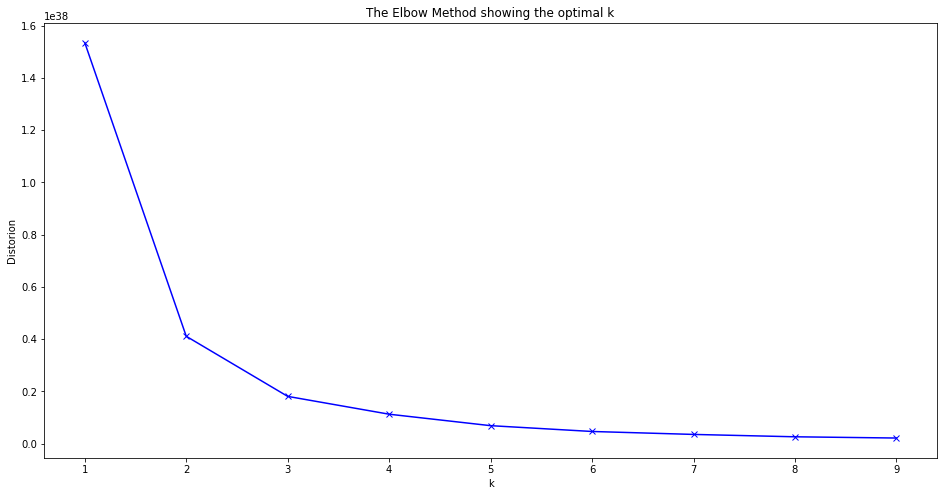

In [5]:
show_elbow(new_df)

In [6]:
kmeanModel = KMeans(n_clusters=3).fit(new_df)
y_pred=kmeanModel.predict(new_df)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [7]:
new_df['Cluster']=y_pred
time=df['time']
new_df=new_df.join(time)

<ipython-input-7-1d27f6cd9b10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster']=y_pred


In [8]:
new_df['time']=pd.to_datetime(new_df['time'])
new_df['time'].dtype
new_df

,latitude,longitude,mag,depth,Unix Timestamp,Cluster,time
912,28.9250,86.6850,6.0,15.0,-586857637000000000,0,1951-05-28 15:59:23
911,29.6820,86.5060,5.8,15.0,-540135388000000000,0,1952-11-19 10:23:32
910,29.5290,81.3820,5.8,10.0,-531875630000000000,0,1953-02-23 00:46:10
909,28.1680,82.3330,5.8,15.0,-515714491000000000,0,1953-08-29 01:58:29
908,28.1690,83.8250,5.9,15.0,-483642971000000000,0,1954-09-04 06:43:49
...,...,...,...,...,...,...,...
4,28.2785,84.3373,5.3,10.0,1621382278000000000,1,2021-05-18 23:57:58
3,28.3088,84.3042,4.9,10.0,1621392098000000000,1,2021-05-19 02:41:38
2,28.2544,84.3876,4.5,10.0,1621443269000000000,1,2021-05-19 16:54:29
1,28.9684,86.3755,4.5,10.0,1621975566000000000,1,2021-05-25 20:46:06


In [9]:
def color_column(df):
    for i in range(0,len(df)):
        
        

#Cluster visualization according to data


colors = ['#DF2020', '#81DF20', '#2095DF']


new_df.plot(x='time',y='mag',kind='scatter', figsize=(15,10))

IndentationError: expected an indented block (<ipython-input-9-ee56dae6dd28>, line 9)

In [10]:
"""For Cluster 0"""
cluster_0 =  new_df.loc[new_df['Cluster']==0]
"""For Cluster 1"""
cluster_1 = new_df.loc[new_df['Cluster']==1]
"""For Cluster 2"""
cluster_2 = new_df.loc[new_df['Cluster']==2]
"""For Cluster 3"""
cluster_3=new_df.loc[new_df['Cluster']==3]

,latitude,longitude,mag,depth,Unix Timestamp,Cluster,time
912,28.925,86.685,6.0,15.0,-586857637000000000,0,1951-05-28 15:59:23
911,29.682,86.506,5.8,15.0,-540135388000000000,0,1952-11-19 10:23:32
910,29.529,81.382,5.8,10.0,-531875630000000000,0,1953-02-23 00:46:10
909,28.168,82.333,5.8,15.0,-515714491000000000,0,1953-08-29 01:58:29
908,28.169,83.825,5.9,15.0,-483642971000000000,0,1954-09-04 06:43:49
...,...,...,...,...,...,...,...
781,28.599,85.714,4.5,52.4,633711986000000000,0,1990-01-30 15:06:26
780,29.925,80.730,4.6,33.0,634578683000000000,0,1990-02-09 15:51:23
779,28.082,82.430,4.8,33.0,635584877000000000,0,1990-02-21 07:21:17
778,28.458,83.343,4.8,33.0,643194602000000000,0,1990-05-20 09:10:02


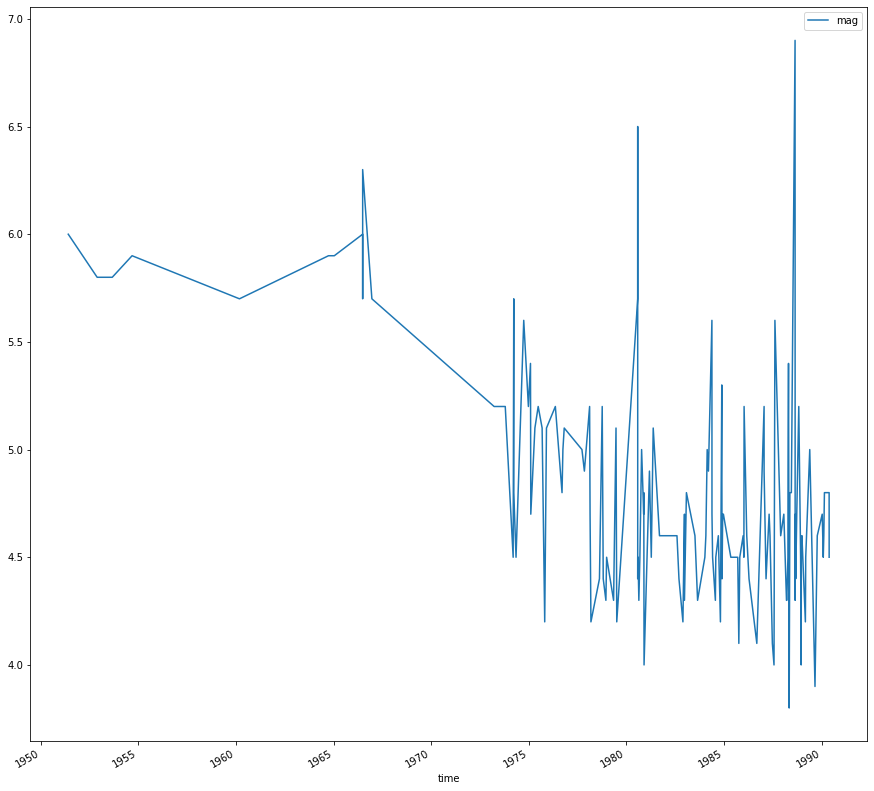

In [20]:
cluster_0.plot(x='time',y='mag',figsize=(15,15),kind='line')
cluster_0

,latitude,longitude,mag,depth,Unix Timestamp,Cluster,time
515,29.8330,82.0650,4.2,35.0,1192745940000000000,1,2007-10-18 22:19:00
514,27.9450,85.3800,4.7,16.1,1193651361000000000,1,2007-10-29 09:49:21
513,28.2000,84.4530,4.3,2.0,1194283946000000000,1,2007-11-05 17:32:26
512,28.0210,87.0360,3.7,75.8,1194399025000000000,1,2007-11-07 01:30:25
511,28.2320,83.6770,3.7,35.0,1203872854000000000,1,2008-02-24 17:07:34
...,...,...,...,...,...,...,...
4,28.2785,84.3373,5.3,10.0,1621382278000000000,1,2021-05-18 23:57:58
3,28.3088,84.3042,4.9,10.0,1621392098000000000,1,2021-05-19 02:41:38
2,28.2544,84.3876,4.5,10.0,1621443269000000000,1,2021-05-19 16:54:29
1,28.9684,86.3755,4.5,10.0,1621975566000000000,1,2021-05-25 20:46:06


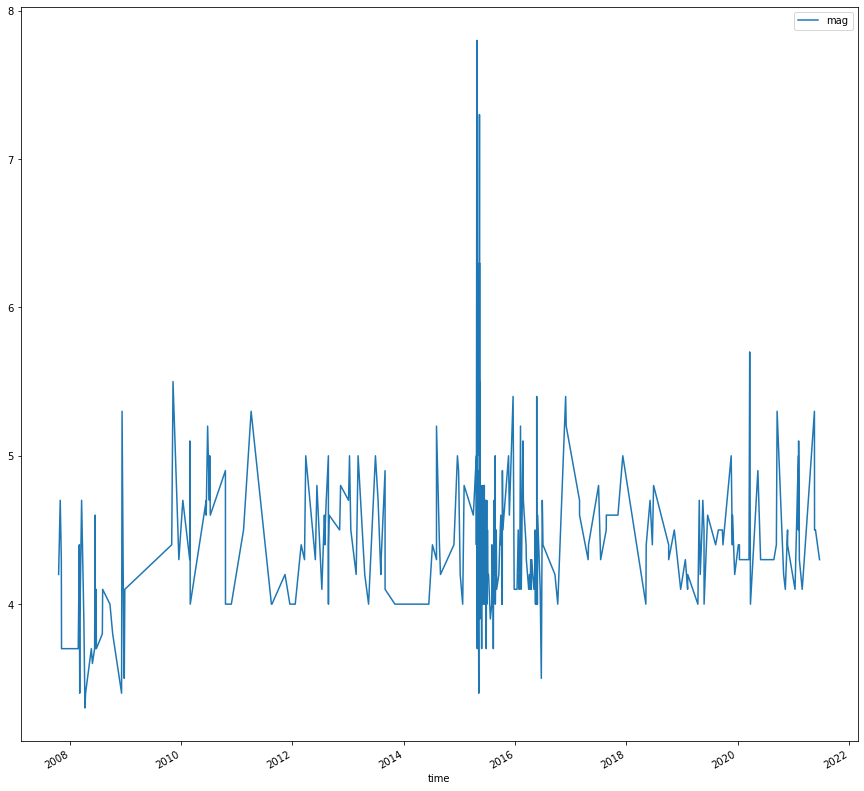

In [21]:
cluster_1.plot(x='time',y='mag',figsize=(15,15),kind='line')
cluster_1

,latitude,longitude,mag,depth,Unix Timestamp,Cluster,time
776,28.762,81.951,4.3,143.2,655920804000000000,2,1990-10-14 16:13:24
775,28.138,82.944,4.8,66.8,661712684000000000,2,1990-12-20 17:04:44
774,28.317,87.683,4.6,42.6,669011296000000000,2,1991-03-15 04:28:16
773,29.340,80.332,4.5,64.9,675235754000000000,2,1991-05-26 05:29:14
772,29.349,80.304,4.6,52.6,675378417000000000,2,1991-05-27 21:06:57
...,...,...,...,...,...,...,...
520,27.291,87.851,4.0,31.7,1179289047000000000,2,2007-05-16 04:17:27
519,29.213,82.196,4.5,10.0,1185981472000000000,2,2007-08-01 15:17:52
518,27.196,86.932,4.3,64.0,1186113052000000000,2,2007-08-03 03:50:52
517,27.344,87.737,5.0,35.0,1186842954000000000,2,2007-08-11 14:35:54


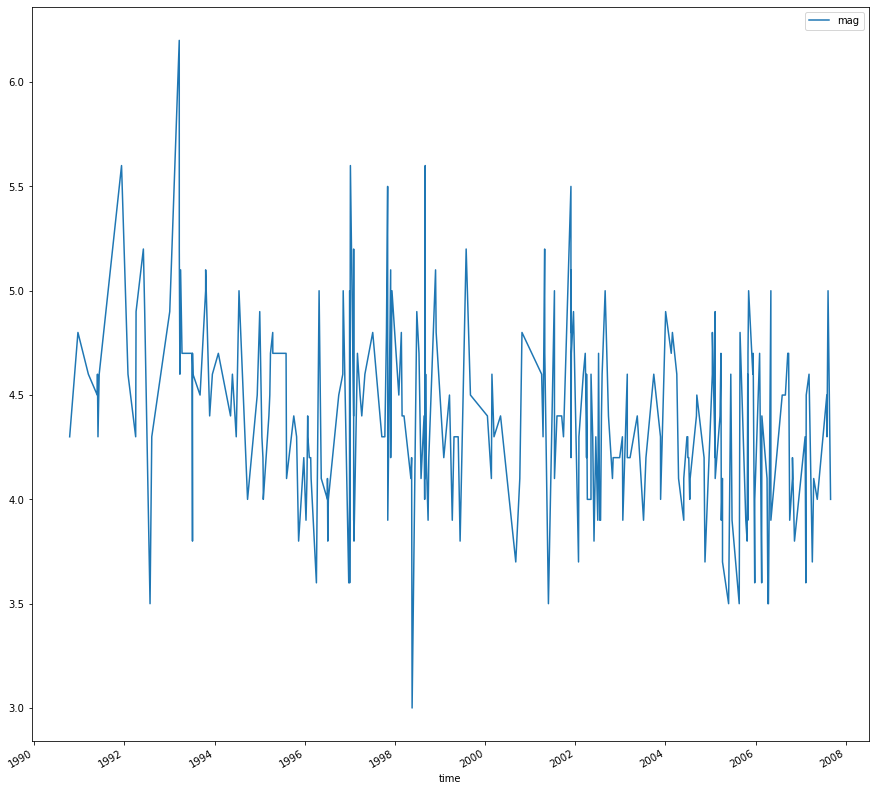

In [22]:
cluster_2.plot(x='time',y='mag',figsize=(15,15),kind='line')
cluster_2

# Now we visualize the earthquake

In [14]:
import geopandas as gpd
import geoplot
from shapely.geometry import Point, Polygon

In [15]:
df = gpd.read_file('countries.geojson')
crs = {'init':'epsg:4326'}

In [16]:
nepal = df.loc[df['ISO_A3']=='NPL']

In [17]:
nepal.head()

,ADMIN,ISO_A3,geometry
170,Nepal,NPL,"POLYGON ((81.77902 30.35804, 81.80150 30.36130..."


C:\Users\Ayush\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

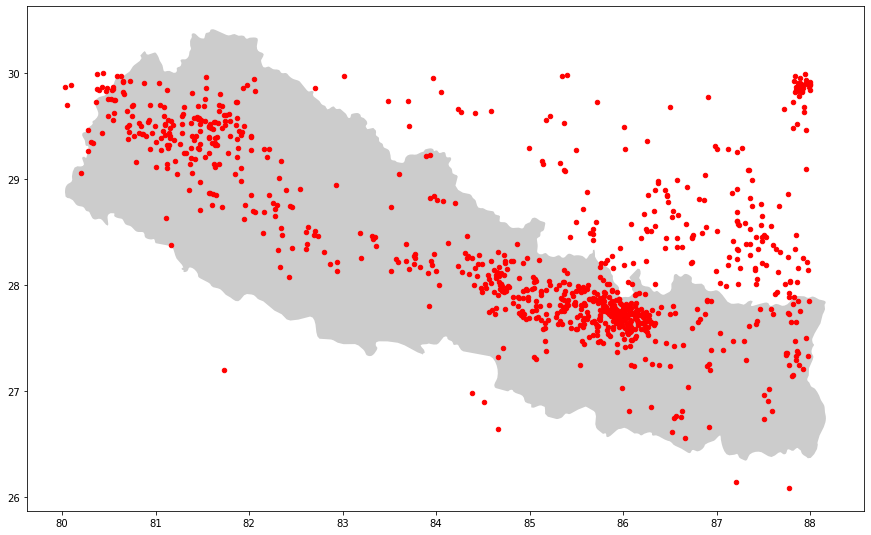

In [18]:
# Here converting the longitude and latitude to 
earthquake=new_df[['latitude','longitude','mag']]
geometry = [Point(xy) for xy in zip(earthquake['longitude'],earthquake['latitude'])]
earthquake = gpd.GeoDataFrame(earthquake,crs=crs, geometry=geometry)

#plotting the base ie. Nepal first
fig,ax = plt.subplots(figsize=(15,15))
nepal.plot(ax=ax,alpha=0.4,color='grey')
earthquake.plot(ax=ax,markersize=20,color='red',marker='o',label='earthquake')

#geoplot.polyplot(nepal,figsize=(15,10))
#earthquake
#earthquake.plot(marker='*',color='green',markersize=1)
#earthquake=earthquake.to_crs(nepal.crs)


In [19]:
earthquake

,latitude,longitude,mag,geometry
912,28.9250,86.6850,6.0,POINT (86.68500 28.92500)
911,29.6820,86.5060,5.8,POINT (86.50600 29.68200)
910,29.5290,81.3820,5.8,POINT (81.38200 29.52900)
909,28.1680,82.3330,5.8,POINT (82.33300 28.16800)
908,28.1690,83.8250,5.9,POINT (83.82500 28.16900)
...,...,...,...,...
4,28.2785,84.3373,5.3,POINT (84.33730 28.27850)
3,28.3088,84.3042,4.9,POINT (84.30420 28.30880)
2,28.2544,84.3876,4.5,POINT (84.38760 28.25440)
1,28.9684,86.3755,4.5,POINT (86.37550 28.96840)
